Disease classification/detection model


Loading Datasets and Preprocessing the Data


In [29]:
# Importing libraries as aliases is done in the following manner
# import Library as Lib

# Numpy is used to perform mathematical operations on matrixes
import numpy as np

# Matplotlib is a visualization library
import matplotlib.pyplot as plt

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import sys 



train_dataset_path = "./Plant_Disease_Classification_Dataset/Train"
validation_dataset_path = "./Plant_Disease_Classification_Dataset/Validation"
test_dataset_path = "./Plant_Disease_Classification_Dataset/Test"

batch_size = 32
img_height = 256
img_width = 256

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path, 
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 150 files belonging to 3 classes.
Using 30 files for validation.
Found 1322 files belonging to 3 classes.
Using 1058 files for training.
Found 60 files belonging to 3 classes.
Using 12 files for validation.


Visualizing the Plant Images

['Healthy', 'Powdery', 'Rust']


2024-08-07 19:48:36.663409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


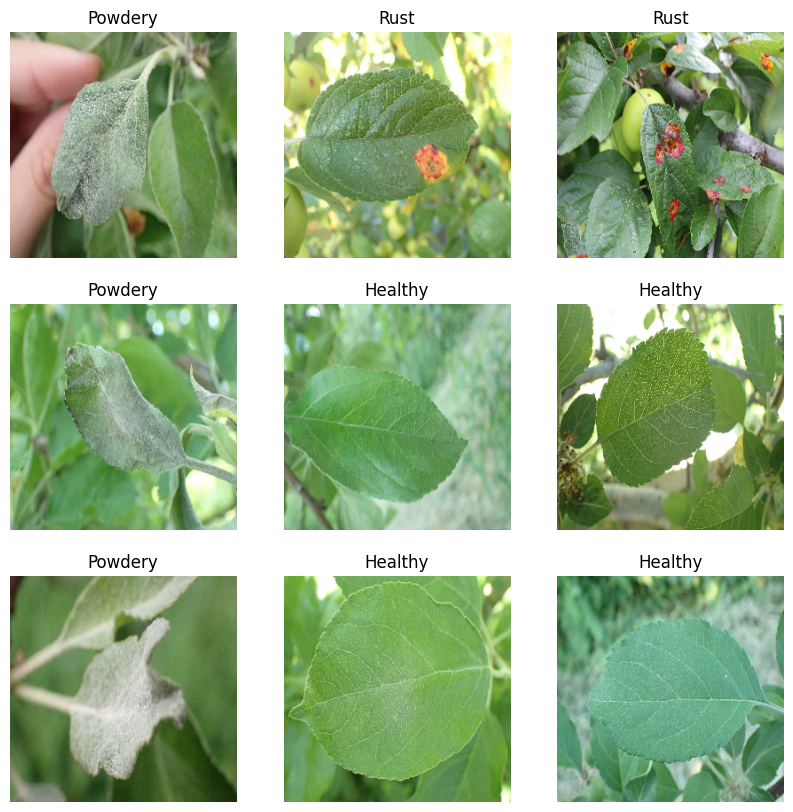

In [17]:
class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

Build a Simple Model 

In [9]:
num_classes = len(train_ds.class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Train and Evaluate Model


In [45]:
epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 1.2446e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 9.3067e-05 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 9.9911e-05 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 6.8132e-05 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 1.0000 - loss: 7.8585e-05 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 1.0000 - loss: 6.6016e-05 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 0.9167 - val_loss: 0.9481
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9945 - loss: 0.0197 - val_accu

Verifying predictions


In [46]:
model.save('plant_disease_detection.keras')


Model Evaluation 

In [47]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('Test accuracy:', test_acc)


1/1 - 0s - 463ms/step - accuracy: 0.9333 - loss: 0.8645
Test accuracy: 0.9333333373069763


Making predictions using the trained model


In [48]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


#tf.predict predicts the label of each of the images in the test set.
predictions = probability_model.predict(test_ds)
#For each image, the output is an array of 3 numbers.
# They represent the model's "confidence that the image corresponds to each of the 3 different plant diseases.
# Let's look at the predictions of the zero-th image
print(predictions[0],"\n")

# Let's look at which is the most likely label (aka, the prediction):
# That is estimated by finding the position of the maximum confidence score
# In the statement below, let's specifically look at what is predictedd for the zero-th image
print(np.argmax(predictions[0]),"\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
[8.7276306e-12 1.0000000e+00 1.1135936e-10] 

1 



Verifying predictions

2024-08-07 21:24:06.730638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


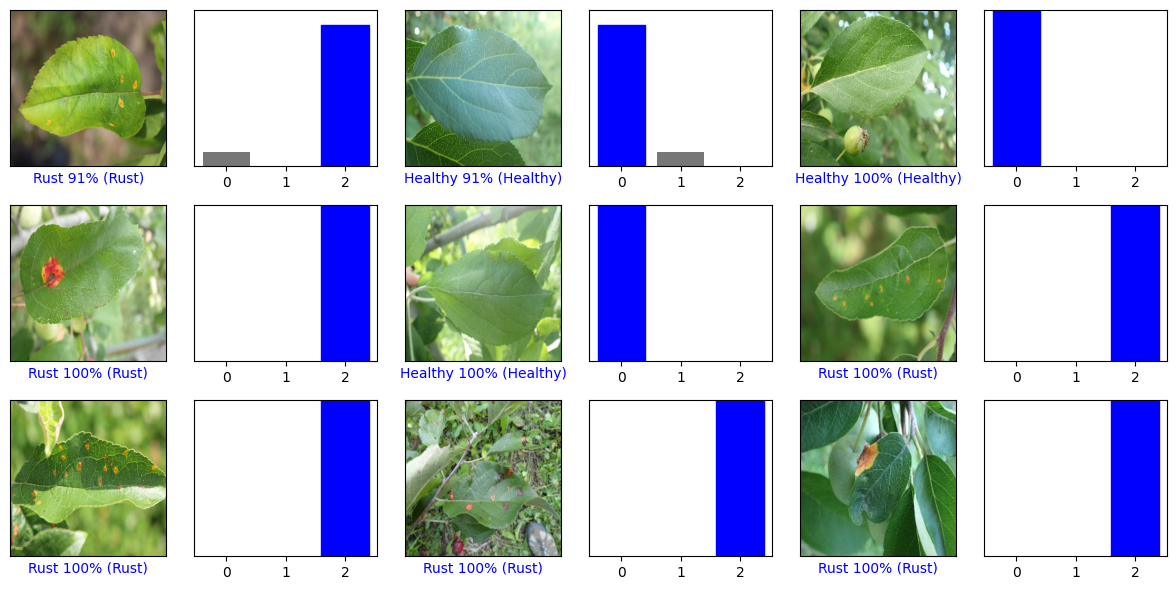

In [51]:
# Extract test images and labels
test_images = []
test_labels = []

for images, labels in test_ds:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Generate predictions
predictions = probability_model.predict(test_images)

# Code to visualize results
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.astype('uint8'))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(class_names)))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
     

# Plot the first X (in our case, we did 5 X 3) test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the Trained model
